# Regression for KNN

1. Import data set

In [1]:
import pandas as pd
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
df.Gender = df['Gender'].replace(['Male', 'Female'],[0,1])
df.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int64  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 200.6 KB


In [4]:
df.describe()

,Gender,Height,Weight
count,8555.000000,8555.000000,8555.000000
mean,0.415546,66.809925,165.632735
std,0.492845,3.851454,32.043922
min,0.000000,54.616858,65.780000
25%,0.000000,63.957684,139.876803
50%,0.000000,66.985923,168.521567
75%,1.000000,69.604427,190.666305
max,1.000000,80.450000,269.989698


# 2. Separate X (Gender, Height) and Y (y=Weight).

In [5]:
X = df.drop("Weight",axis=1)
X.head()

,Gender,Height
0,0,73.847017
1,0,68.781904
2,0,74.110105
3,0,71.730978
4,0,69.881796


In [6]:
y = df["Weight"]
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

# 3. Train = 70%, Test = 30%

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3,random_state=42, )


In [9]:
X_train.shape

(5988, 2)

In [10]:
X_test.shape

(2567, 2)

# 4. Apply Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lnr = LinearRegression()

In [13]:
lnr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred_testing = lnr.predict(X_test)
y_pred_testing

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

In [15]:
y_pred_training = lnr.predict(X_train)
y_pred_training

array([178.35427565, 202.22486558, 129.22191775, ..., 139.34406368,
       187.17224616, 158.78183812])

# 5. Evaluate the Model (Testing and training Accuracy, MSE for testing)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mse_training =  mean_squared_error(y_train,y_pred_training )
mse_training

105.23806184862875

In [18]:
mse_testing = mean_squared_error(y_test,y_pred_testing)
mse_testing

96.83734437830608

In [19]:
mse_comparison = pd.DataFrame([mse_training, mse_testing ], columns=["MSE_lnr"], index=[mse_training, mse_testing ])
mse_comparison 

,MSE_lnr
105.238062,105.238062
96.837344,96.837344


# 6. Apply KNN Regressor:

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
knn = KNeighborsRegressor()

In [22]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [23]:
y_pred_training_knn = knn.predict(X_train)
y_pred_training_knn

array([176.58174146, 205.54968066, 129.31875904, ..., 142.55470934,
       192.1316955 , 162.1670885 ])

In [24]:
y_pred_testing_knn = knn.predict(X_test)
y_pred_testing_knn

array([142.1445657 , 181.38276924, 187.07075266, ..., 101.79654426,
       192.43702356, 145.3632227 ])

# 7. Evaluate the Model (Testing and training Accuracy, MSE for testing)

In [25]:
mse_training_knn = mean_squared_error(y_train, y_pred_training_knn)
mse_training_knn


84.89719950967454

In [26]:
mse_testing_knn = mean_squared_error(y_test, y_pred_testing_knn)
mse_testing_knn

121.33528273624482

In [27]:
mse_comparision_knn = pd.DataFrame([mse_training_knn, mse_testing_knn], columns=["mse_knn"], index=["mse_training", "mse_testing"])
mse_comparision_knn

,mse_knn
mse_training,84.897200
mse_testing,121.335283


# 8. Compare KNN & Linear Regression with the KNN Model and Linear regression as well.

In [31]:
comparision_mse = pd.merge(mse_comparison, mse_comparision_knn, left_index=True, right_index=True)
comparision_mse

,MSE_lnr,mse_knn


# Linear Regression 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Weight VS Predicted Weight for Training Data')

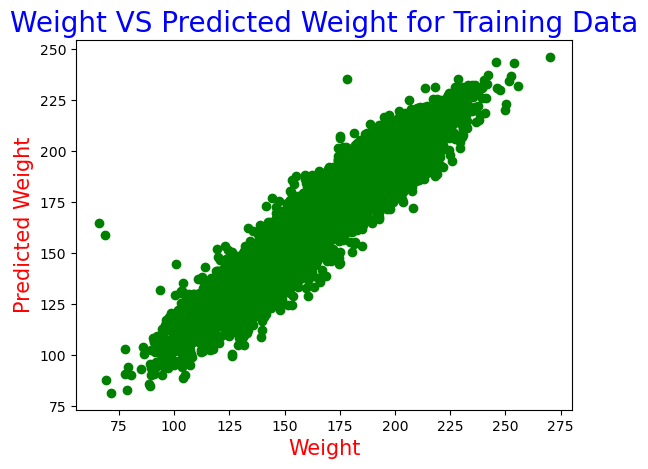

In [36]:
plt.scatter(y_train, y_pred_training, color='green')
plt.xlabel("Weight",fontsize=15,color='red')
plt.ylabel("Predicted Weight",fontsize=15,color='red')
plt.title("Weight VS Predicted Weight for Training Data", fontsize=20,color='blue')

Text(0.5, 1.0, 'Weight VS Predicted Weight for Test Data')

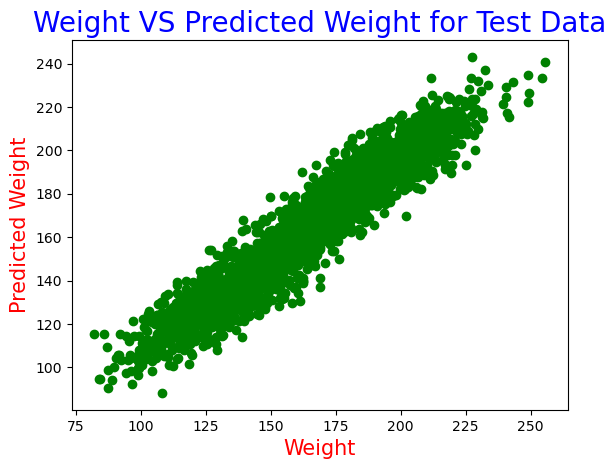

In [38]:
plt.scatter(y_test, y_pred_testing,color='green')
plt.xlabel("Weight",fontsize=15,color='red')
plt.ylabel("Predicted Weight",fontsize=15,color='red')
plt.title("Weight VS Predicted Weight for Test Data", fontsize=20,color='blue')

Text(0.5, 1.0, 'Weight VS Predicted Weight for Training Data')

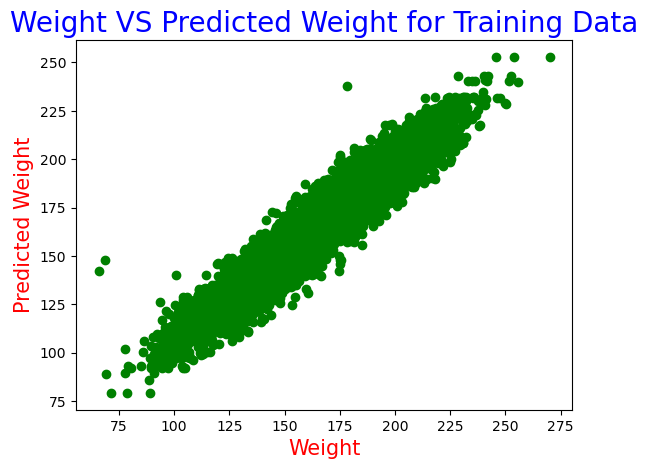

In [40]:
plt.scatter(y_train, y_pred_training_knn,color='green')
plt.xlabel("Weight",fontsize=15,color='red')
plt.ylabel("Predicted Weight",fontsize=15,color='red')
plt.title("Weight VS Predicted Weight for Training Data", fontsize=20,color='blue')

Text(0.5, 1.0, 'Weight VS Predicted Weight for Training Data')

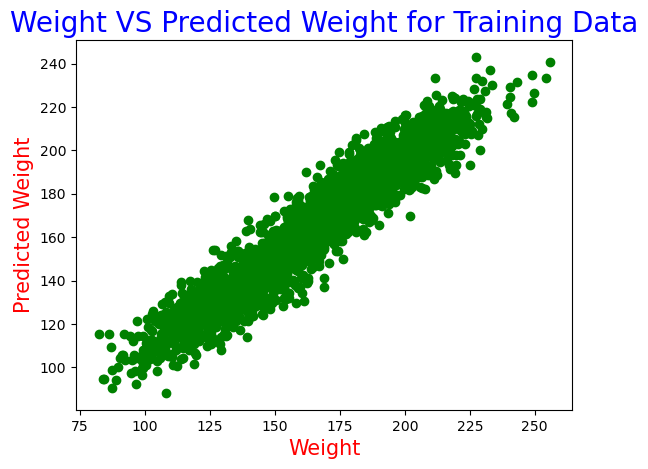

In [42]:
plt.scatter(y_test, y_pred_testing,color='green')
plt.xlabel("Weight",fontsize=15,color='red')
plt.ylabel("Predicted Weight",fontsize=15,color='red')
plt.title("Weight VS Predicted Weight for Training Data", fontsize=20,color='blue')


# Assignment:(7.2)
KNN for Classification

1. Import data set

In [43]:
weight_height = pd.read_csv("weight-height.csv")
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [44]:
weight_height.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [45]:
weight_height.describe(include="all")

,Gender,Height,Weight
count,8555,8555.000000,8555.000000
unique,2,NaN,NaN
top,Male,NaN,NaN
freq,5000,NaN,NaN
mean,NaN,66.809925,165.632735
std,NaN,3.851454,32.043922
min,NaN,54.616858,65.780000
25%,NaN,63.957684,139.876803
50%,NaN,66.985923,168.521567
75%,NaN,69.604427,190.666305


In [46]:
weight_height["Gender"] =weight_height["Gender"] .replace(["Male","Female"], [0,1])

In [52]:
weight_height.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [53]:
weight_height.tail()

,Gender,Height,Weight
8550,1,60.483946,110.565497
8551,1,63.423372,129.921671
8552,1,65.584057,155.942671
8553,1,67.429971,151.678405
8554,1,60.921791,131.253738


# 2. Separate X and Y. (y=Gender)

In [56]:
X_knn =weight_height.drop("Gender",axis=1)
X_knn

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [57]:
Y_knn =weight_height["Gender"]
Y_knn

0       0
1       0
2       0
3       0
4       0
       ..
8550    1
8551    1
8552    1
8553    1
8554    1
Name: Gender, Length: 8555, dtype: int64

# 3. Train = 70%, Test = 30%

In [58]:
Xknn_train, Xknn_test,Yknn_train,Yknn_test = train_test_split(X_knn ,Y_knn, test_size=.3, random_state=42)

In [59]:
Xknn_train.shape

(5988, 2)

In [60]:
Xknn_test.shape

(2567, 2)

In [61]:
Yknn_test.shape

(2567,)

# 4. Apply KNN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn_class = KNeighborsClassifier()

In [64]:
knn_class.fit(Xknn_train,Yknn_train)

KNeighborsClassifier()

In [65]:
y_pred_class = knn_class.predict(Xknn_test)
y_pred_class

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

# 5. Evaluate the Model by only Accuracy.

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
acc_Score = accuracy_score(Yknn_test,y_pred_class)
acc_Score

0.9131281651733542